In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

#uploading the csv

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
churn.drop(['CaseOrder','Customer_id','Interaction', 'UID'], axis=1, inplace = True)

In [4]:
churn['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [5]:
churn['State'].describe()

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object

In [6]:
churn['Lng'].describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

In [7]:
churn['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [8]:
churn['City'].describe()

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object

In [9]:
churn['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [10]:
churn['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [11]:
churn['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

In [12]:
churn['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [13]:
churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [14]:
churn['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [15]:
churn['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [16]:
churn['OnlineBackup'].describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

In [17]:
churn['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [18]:
churn['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [19]:
churn['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [20]:
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  10000 non-null  object 
 1   State                 10000 non-null  object 
 2   County                10000 non-null  object 
 3   Zip                   10000 non-null  int64  
 4   Lat                   10000 non-null  float64
 5   Lng                   10000 non-null  float64
 6   Population            10000 non-null  int64  
 7   Area                  10000 non-null  object 
 8   TimeZone              10000 non-null  object 
 9   Job                   10000 non-null  object 
 10  Children              10000 non-null  int64  
 11  Age                   10000 non-null  int64  
 12  Income                10000 non-null  float64
 13  Marital               10000 non-null  object 
 14  Gender                10000 non-null  object 
 15  Churn               

In [21]:
#Importing One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

#Transforming the categorical variables to type category
churn['City'] = churn['City'].astype('category')
churn['Area'] = churn['Area'].astype('category')
churn['TimeZone'] = churn['TimeZone'].astype('category')
churn['Job'] = churn['Job'].astype('category')
churn['State'] = churn['State'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['Port_modem'] = churn['Port_modem'].astype('category')
churn['Tablet'] = churn['Tablet'].astype('category')
churn['Techie'] = churn['Techie'].astype('category')
churn['Contract'] = churn['Contract'].astype('category')
churn['InternetService'] = churn['InternetService'].astype('category')
churn['Phone'] = churn['Phone'].astype('category')
churn['Multiple'] = churn['Multiple'].astype('category')
churn['TechSupport'] = churn['TechSupport'].astype('category')
churn['County'] = churn['County'].astype('category')
churn['Zip'] = churn['Zip'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype('category')
churn['OnlineBackup'] = churn['OnlineBackup'].astype('category')
churn['DeviceProtection'] = churn['DeviceProtection'].astype('category')
churn['StreamingTV'] = churn['StreamingTV'].astype('category')
churn['StreamingMovies'] = churn['StreamingMovies'].astype('category')
churn['PaperlessBilling'] = churn['PaperlessBilling'].astype('category')
churn['PaymentMethod'] = churn['PaymentMethod'].astype('category')
churn['Item1'] = churn['Item1'].astype('category')
churn['Item2'] = churn['Item2'].astype('category')
churn['Item3'] = churn['Item3'].astype('category')
churn['Item4'] = churn['Item4'].astype('category')
churn['Item5'] = churn['Item5'].astype('category')
churn['Item6'] = churn['Item6'].astype('category')
churn['Item7'] = churn['Item7'].astype('category')
churn['Item8'] = churn['Item8'].astype('category')
churn['Churn'] = churn['Churn'].astype('category')

#Storing variables as numerical category codes
churn['City_cat'] = churn['City'].cat.codes
churn['Area_cat'] = churn['Area'].cat.codes
churn['TZ_cat'] = churn['TimeZone'].cat.codes
churn['Job_cat'] = churn['Job'].cat.codes
churn['State_cat'] = churn['State'].cat.codes
churn['Gender_cat'] = churn['Gender'].cat.codes
churn['Techie01'] = churn['Techie'].cat.codes
churn['Contract_cat'] = churn['Contract'].cat.codes
churn['InternetService_cat'] = churn['InternetService'].cat.codes
churn['Multiple01'] = churn['Multiple'].cat.codes

churn['County_cat'] = churn['County'].cat.codes
churn['Zip_cat'] = churn['Zip'].cat.codes
churn['Marital_cat'] = churn['Marital'].cat.codes
churn['Modem'] = churn['Port_modem'].cat.codes
churn['Tablet01'] = churn['Tablet'].cat.codes
churn['Phone01'] = churn['Phone'].cat.codes
churn['DP'] = churn['DeviceProtection'].cat.codes
churn['STV'] = churn['StreamingTV'].cat.codes
churn['SMov'] = churn['StreamingMovies'].cat.codes
churn['PB'] = churn['PaperlessBilling'].cat.codes
churn['PM'] = churn['PaymentMethod'].cat.codes
churn['OB'] = churn['OnlineBackup'].cat.codes
churn['OS'] = churn['OnlineSecurity'].cat.codes
churn['TS'] = churn['TechSupport'].cat.codes
churn['1'] = churn['Item1'].cat.codes
churn['2'] = churn['Item2'].cat.codes
churn['3'] = churn['Item3'].cat.codes
churn['4'] = churn['Item4'].cat.codes
churn['5'] = churn['Item5'].cat.codes
churn['6'] = churn['Item6'].cat.codes
churn['7'] = churn['Item7'].cat.codes
churn['8'] = churn['Item8'].cat.codes
churn['Churn01'] = churn['Churn'].cat.codes


# Create an instance of One hot encoder
enc = OneHotEncoder()
  
# Passing encoded columns through One hot encoder
  
churn_enc = pd.DataFrame(enc.fit_transform(
    churn[['State_cat', 'Gender_cat','Techie01','Contract_cat','InternetService_cat', 'Multiple01',
         'City_cat', 'Area_cat', 'TZ_cat', 'Job_cat', 'Zip_cat', 'Marital_cat', 'Modem',
          'Tablet01', 'Phone01', 'DP', 'STV', 'SMov', 'PB', 'PM', 'OB', 'OS', 'TS','1','2','3','4','5','6',
          '7', '8','Churn01']]).toarray())
  
# Merge with main
churn_updated= churn.join(churn_enc)

churn.drop(['City', 'State', 'County', 'Zip', 'Area', 'TimeZone', 'Job','Marital','Gender', 'Churn', 
            'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
           'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1, inplace=True)

  
print(churn)

           Lat        Lng  Population  Children  Age    Income  \
0     56.25100 -133.37571          38         0   68  28561.99   
1     44.32893  -84.24080       10446         1   27  21704.77   
2     45.35589 -123.24657        3735         4   50   9609.57   
3     32.96687 -117.24798       13863         1   48  18925.23   
4     29.38012  -95.80673       11352         0   83  40074.19   
...        ...        ...         ...       ...  ...       ...   
9995  43.43391  -72.78734         640         3   23  55723.74   
9996  36.56907  -87.41694       77168         4   48  34129.34   
9997  35.52039 -100.44180         406         1   48  45983.43   
9998  33.58016  -85.13241       35575         1   39  16667.58   
9999  34.70783  -83.53648       12230         1   28   9020.92   

      Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  ...  TS  1  \
0               7.978323     10         0                     1  ...   0  4   
1              11.699080     12         0        

In [22]:
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
 13  City_cat              10000 non-null  int16  
 14  Area_cat              10000 non-null  int8   
 15  TZ_cat              

In [23]:
churn.to_csv(r'C:\Users\abram\Downloads\churn_encoded.csv', encoding='utf-8')

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,City_cat,Area_cat,TZ_cat,Job_cat,State_cat,Gender_cat,Techie01,Contract_cat,InternetService_cat,Multiple01,County_cat,Zip_cat,Marital_cat,Modem,Tablet01,Phone01,DP,STV,SMov,PB,PM,OB,OS,TS,1,2,3,4,5,6,7,8,Churn01
Lat,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,-0.007125,-0.015743,0.001406,-0.016949,0.020470,0.010734,-0.062556,-0.005806,0.111427,-0.018062,0.009987,-0.008518,0.022667,-0.006479,0.035373,-0.050168,-0.011052,-0.019988,0.001608,-0.005639,0.017594,0.017822,-0.000064,0.020627,-0.012681,-0.013009,-0.005409,-0.009164,0.005793,0.005380,-0.003421,0.011015,-0.000464,-0.008726,0.006087,-0.019583,0.009387
Lng,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,-0.005577,0.003618,0.011765,0.003446,-0.024748,-0.007889,0.304050,0.008581,0.242691,0.013443,-0.001746,0.010609,-0.000323,-0.007049,-0.045176,-0.888841,0.016088,-0.003269,0.018904,-0.006163,0.021181,-0.008576,0.010398,0.002424,-0.010692,0.015037,0.003072,-0.009469,0.024389,0.003024,0.014966,-0.002398,0.001366,-0.008770,0.001601,0.001912,-0.004603
Population,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,-0.003902,-0.018429,-0.005373,0.139759,0.009747,-0.096055,-0.010659,-0.011483,0.013686,-0.006590,-0.001241,-0.007398,0.038886,-0.005016,0.008577,0.001225,0.008196,-0.003795,-0.006590,-0.005882,0.008656,-0.000579,0.010352,0.012549,-0.006606,0.000618,-0.002571,0.001620,-0.008272,0.006970,0.000834,-0.013062,0.008524,-0.008533
Children,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,-0.019620,-0.007879,0.005933,-0.007239,-0.008031,0.006032,-0.006884,0.023639,0.006013,-0.021969,-0.005332,-0.016753,0.000045,0.011283,0.001494,-0.001629,0.005477,-0.007106,0.003461,0.006828,0.000818,-0.000297,0.006937,0.000878,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236,-0.004264
Age,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.003964,0.011745,0.009905,0.009304,-0.007680,-0.005660,-0.007531,-0.010071,0.005027,-0.004674,0.001291,-0.008526,-0.009721,0.006081,-0.004384,0.009521,0.014489,-0.000197,0.010125,0.002247,-0.024085,0.003309,-0.011213,0.017155,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193,0.005630
Income,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.007892,0.002557,-0.005384,0.013051,0.011632,-0.018436,0.005442,-0.002990,-0.012867,-0.000214,0.014326,0.002952,-0.005045,-0.014977,0.005999,-0.001677,0.014073,-0.003324,-0.002186,-0.012049,0.018082,-0.005974,-0.010385,0.008835,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740,0.005937
Outage_sec_perweek,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.009305,0.000239,-0.004580,0.004112,0.009140,0.008887,-0.006264,0.013021,0.011747,0.012142,-0.000760,-0.011146,-0.016180,0.006326,0.005614,-0.010267,0.022008,0.008952,0.018086,-0.011208,-0.002490,0.000457,-0.002416,-0.013221,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126,-0.000156
Email,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,-0.000479,-0.003444,0.011345,0.020613,0.005312,0.007882,-0.014047,-0.002403,0.000554,-0.002966,-0.000405,-0.007740,0.001838,0.014196,-0.008579,-0.007281,0.001520,0.005099,0.000711,-0.012632,0.000556,-0.011763,-0.024908,0.022119,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857,0.012326
Contacts,-0.002213,0.008118,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032

<Axes: >

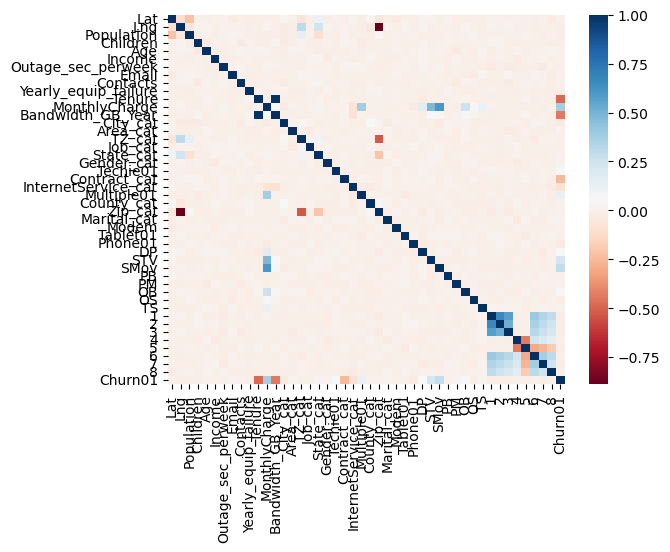

In [24]:
#ensure all columns show
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# calculate the correlation matrix
corr = churn.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [25]:
#Picking my independent variables based on correlation with customer charge
#Question: what factors cause higher monthly charges?
 #15 Most highly correlated are: Multiple01, STV, SMov, OB, Outage_sec_perweek, Bandwidth_GB_Year, State_cat,
    #InternetService_cat, DP, OS, City_cat, Phone01, TS, Lng, Age
#based on correlation > ~ .01

churn.drop(['Lat','Population', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure',
            'Area_cat','TZ_cat', 'Job_cat', 'Gender_cat', 'County_cat', 'Zip_cat', 'Techie01', 'Contract_cat',
            'Marital_cat', 'Modem', 'Tablet01','PB','PM', '1', '2','3', '4','5','6','7','8'],axis=1, inplace=True)

In [26]:
churn['Multiple01'].describe()

count    10000.000000
mean         0.460800
std          0.498486
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Multiple01, dtype: float64

In [27]:
churn['STV'].describe()

count    10000.000000
mean         0.492900
std          0.499975
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: STV, dtype: float64

In [28]:
churn['SMov'].describe()

count    10000.000000
mean         0.489000
std          0.499904
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SMov, dtype: float64

In [29]:
churn['OB'].describe()

count    10000.000000
mean         0.450600
std          0.497579
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: OB, dtype: float64

In [30]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  10000 non-null  float64
 1   Outage_sec_perweek   10000 non-null  float64
 2   MonthlyCharge        10000 non-null  float64
 3   Bandwidth_GB_Year    10000 non-null  float64
 4   City_cat             10000 non-null  int16  
 5   State_cat            10000 non-null  int8   
 6   InternetService_cat  10000 non-null  int8   
 7   Multiple01           10000 non-null  int8   
 8   Phone01              10000 non-null  int8   
 9   DP                   10000 non-null  int8   
 10  STV                  10000 non-null  int8   
 11  SMov                 10000 non-null  int8   
 12  OB                   10000 non-null  int8   
 13  OS                   10000 non-null  int8   
 14  TS                   10000 non-null  int8   
 15  Churn01              10000 non-null  

In [31]:
# Building the model
#define our input variable (X) & output variable

churn_dep = churn.drop(['Lng','Outage_sec_perweek', 'Bandwidth_GB_Year', 'City_cat', 'State_cat', 'InternetService_cat'
                       , 'Multiple01', 'Phone01', 'DP', 'STV', 'SMov', 'OB', 'OS', 'TS', 'Churn01'], axis = 1)

X = churn.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 96.75
----------------------------------------------------------------------------------------------------
The Coefficient for Lng is 0.02
The Coefficient for Outage_sec_perweek is -0.011
The Coefficient for Bandwidth_GB_Year is -0.00025
The Coefficient for City_cat is -6.6e-05
The Coefficient for State_cat is -9.8e-05
The Coefficient for InternetService_cat is -3.7
The Coefficient for Multiple01 is 3.3e+01
The Coefficient for Phone01 is -0.88
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.3e+01
The Coefficient for OS is 3.0
The Coefficient for TS is 1.2e+01
The Coefficient for Churn01 is -0.22


In [33]:
#Evaluating our model
#Testing for heterosecdasticity

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")



8.477067074582207e-96 8.732767688950004e-101
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 8.477e-96
We reject the null hypthoesis, so there is heterosecdasticity. 

2.6033444623566386e-107 1.635855795820522e-110
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 2.603e-107
We reject the null hypthoesis, so there is heterosecdasticity.


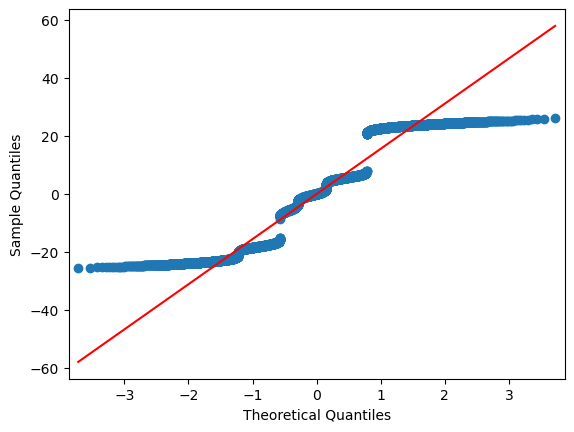

The mean of the residuals is 1.077e-12


In [34]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

#condition satisfied

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was less than 0.05
Therefore, we fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


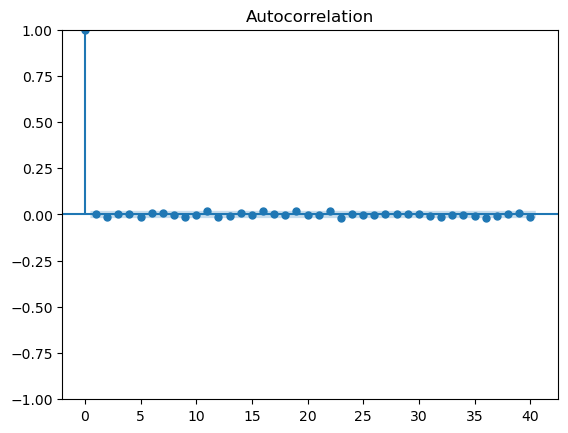

In [35]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > ".05" :
    print("The lowest p-value found was less than 0.05")
    print("Therefore, we fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

In [36]:
#going to allow for robust standard errors due to the heterodascticity

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     4397.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:05   Log-Likelihood:                -41643.
No. Observations:               10000   AIC:                         8.332e+04
Df Residuals:                    9984   BIC:                         8.343e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  96.8532    

# Reducing the model using varation inflation factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = churn[['Lng', 'Outage_sec_perweek','Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)



               feature        VIF
0                  Lng  17.904159
1   Outage_sec_perweek  10.562030
2    Bandwidth_GB_Year   4.534547
3             City_cat   3.802060
4            State_cat   3.856360
5           Multiple01   1.897073
6              Phone01   9.377942
7                   DP   1.769975
8                  STV   2.185996
9                 SMov   2.265222
10                  OB   1.824260
11                  OS   1.547632
12                  TS   1.591044
13             Churn01   2.194639


In [38]:
# Reducing the model one at a time, drop Lng
churn_dep = churn.drop(['Lng', 'Outage_sec_perweek','Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01'], axis = 1)
churn_reduced= churn[['Outage_sec_perweek','Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01', 'MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 90.98
----------------------------------------------------------------------------------------------------
The Coefficient for Outage_sec_perweek is -0.024
The Coefficient for Bandwidth_GB_Year is -2.7e-05
The Coefficient for City_cat is -5.6e-05
The Coefficient for State_cat is 0.0054
The Coefficient for Multiple01 is 3.3e+01
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 3.1
The Coefficient for TS is 1.2e+01
The Coefficient for Churn01 is 0.96


In [40]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     4907.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -41788.
No. Observations:               10000   AIC:                         8.360e+04
Df Residuals:                    9986   BIC:                         8.370e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 91.1229      0

In [41]:
#continuing to run VIF and remove variables one at a atime.

X = churn[['Outage_sec_perweek','Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)




               feature       VIF
0   Outage_sec_perweek  8.511081
1    Bandwidth_GB_Year  4.353662
2             City_cat  3.588483
3            State_cat  3.848517
4           Multiple01  1.879847
5              Phone01  7.700206
6                   DP  1.755986
7                  STV  2.171638
8                 SMov  2.258047
9                   OB  1.812214
10                  OS  1.536483
11                  TS  1.572092
12             Churn01  2.170717


In [42]:
# Reducing the model one at a time, drop Outage_sec_perweek
churn_dep = churn.drop(['Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01'], axis = 1)
churn_reduced= churn[['Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01', 'MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 90.75
----------------------------------------------------------------------------------------------------
The Coefficient for Bandwidth_GB_Year is -2.7e-05
The Coefficient for City_cat is -5.6e-05
The Coefficient for State_cat is 0.0054
The Coefficient for Multiple01 is 3.3e+01
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 3.1
The Coefficient for TS is 1.2e+01
The Coefficient for Churn01 is 0.96


In [44]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     5317.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -41788.
No. Observations:               10000   AIC:                         8.360e+04
Df Residuals:                    9987   BIC:                         8.370e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                90.9808      0.79

In [45]:
#continuing to run VIF and remove variables one at a atime.

X = churn[['Bandwidth_GB_Year','City_cat','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)




              feature       VIF
0   Bandwidth_GB_Year  4.215686
1            City_cat  3.451168
2           State_cat  3.676076
3          Multiple01  1.861263
4             Phone01  6.429853
5                  DP  1.730377
6                 STV  2.157020
7                SMov  2.243324
8                  OB  1.799524
9                  OS  1.527507
10                 TS  1.562467
11            Churn01  2.158429


In [46]:
# Reducing the model one at a time, drop City_cat based on p-value and standard error
churn_dep = churn.drop(['Bandwidth_GB_Year','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01'], axis = 1)
churn_reduced= churn[['Bandwidth_GB_Year','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01', 'MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 90.58
----------------------------------------------------------------------------------------------------
The Coefficient for Bandwidth_GB_Year is -2.6e-05
The Coefficient for State_cat is 0.0054
The Coefficient for Multiple01 is 3.3e+01
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 3.1
The Coefficient for TS is 1.2e+01
The Coefficient for Churn01 is 0.97


In [48]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est4 = est.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     5801.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -41788.
No. Observations:               10000   AIC:                         8.360e+04
Df Residuals:                    9988   BIC:                         8.369e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                90.8568      0.74

In [49]:
#continuing to run VIF and remove variables one at a atime.

X = churn[['Bandwidth_GB_Year','State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)



              feature       VIF
0   Bandwidth_GB_Year  4.156286
1           State_cat  3.616442
2          Multiple01  1.857076
3             Phone01  5.795533
4                  DP  1.723061
5                 STV  2.151388
6                SMov  2.241691
7                  OB  1.791015
8                  OS  1.524249
9                  TS  1.557698
10            Churn01  2.154253


In [50]:
#remove bandwidth_gb_year based on p-value and standard error

churn_dep = churn.drop(['State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01'], axis = 1)
churn_reduced= churn[['State_cat', 'Multiple01',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01', 'MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 90.5
----------------------------------------------------------------------------------------------------
The Coefficient for State_cat is 0.0054
The Coefficient for Multiple01 is 3.3e+01
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 3.1
The Coefficient for TS is 1.2e+01
The Coefficient for Churn01 is 1.0


In [52]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est5 = est.fit()
print(est5.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     6381.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -41788.
No. Observations:               10000   AIC:                         8.360e+04
Df Residuals:                    9989   BIC:                         8.368e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.7234      0.700    129.537      0.0

In [53]:
#continuing to run VIF and remove variables one at a atime.
#removed Multiple01 bc it includes the other variables

X = churn[['State_cat',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS', 'Churn01']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)



     feature       VIF
0  State_cat  0.000002
1    Phone01  0.058647
2         DP  0.013221
3        STV  0.026293
4       SMov  0.010958
5         OB -0.039623
6         OS -0.003391
7         TS -0.037129
8    Churn01  0.054012


In [54]:
#removed multiple and churn01 bc of its inherent relationship with other variables

churn_dep = churn.drop(['State_cat',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS'], axis = 1)
churn_reduced= churn[['State_cat',
         'Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS','MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 106.0
----------------------------------------------------------------------------------------------------
The Coefficient for State_cat is -0.0034
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 2.9
The Coefficient for TS is 1.2e+01


In [56]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est6 = est.fit()
print(est6.summary())



                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3174.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -45465.
No. Observations:               10000   AIC:                         9.095e+04
Df Residuals:                    9991   BIC:                         9.101e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7506      0.989    106.874      0.0

In [57]:
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  10000 non-null  float64
 1   Outage_sec_perweek   10000 non-null  float64
 2   MonthlyCharge        10000 non-null  float64
 3   Bandwidth_GB_Year    10000 non-null  float64
 4   City_cat             10000 non-null  int16  
 5   State_cat            10000 non-null  int8   
 6   InternetService_cat  10000 non-null  int8   
 7   Multiple01           10000 non-null  int8   
 8   Phone01              10000 non-null  int8   
 9   DP                   10000 non-null  int8   
 10  STV                  10000 non-null  int8   
 11  SMov                 10000 non-null  int8   
 12  OB                   10000 non-null  int8   
 13  OS                   10000 non-null  int8   
 14  TS                   10000 non-null  int8   
 15  Churn01              10000 non-null  

In [58]:
churn.drop(['Lng', 'Outage_sec_perweek', 'Bandwidth_GB_Year', 'City_cat', 'Multiple01',
                        'Churn01'], axis = 1, inplace=True)

In [59]:
#Evaluating our model
#Testing for heterosecdasticity

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")



0.7264811697435734 0.7271292475547319
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.7265
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.26506451841196865 0.26513474725967306
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2651
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


# There is no more heterosecdasticity so now I can focus on p-values without robust standard error

In [60]:
#remove state_cat due to p-val

churn_dep = churn.drop(['Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS'], axis = 1)
churn_reduced= churn[['Phone01', 'DP', 'STV','SMov','OB', 'OS', 'TS','MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [61]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 106.0
----------------------------------------------------------------------------------------------------
The Coefficient for Phone01 is -0.94
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 2.9
The Coefficient for TS is 1.1e+01


In [62]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est7 = est.fit()
print(est7.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3628.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -45465.
No. Observations:               10000   AIC:                         9.095e+04
Df Residuals:                    9992   BIC:                         9.100e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.6953      0.903    116.985      0.0

In [63]:
X = churn[['Phone01','DP', 'STV','SMov','OB', 'OS', 'TS']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)


   feature       VIF
0  Phone01  0.045609
1       DP  0.013045
2      STV  0.024213
3     SMov  0.009774
4       OB -0.039044
5       OS -0.003375
6       TS -0.036821


In [64]:
#remove phone due to p-val

churn_dep = churn.drop(['DP', 'STV','SMov','OB', 'OS', 'TS'], axis = 1)
churn_reduced= churn[['DP', 'STV','SMov','OB', 'OS', 'TS','MonthlyCharge']].copy()
X = churn_reduced.drop('MonthlyCharge', axis = 1)
Y = churn_dep[['MonthlyCharge']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [65]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.6}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 105.087
----------------------------------------------------------------------------------------------------
The Coefficient for DP is 1.3e+01
The Coefficient for STV is 4.2e+01
The Coefficient for SMov is 5.2e+01
The Coefficient for OB is 2.2e+01
The Coefficient for OS is 2.9
The Coefficient for TS is 1.2e+01


In [66]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est8 = est.fit()
print(est8.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     4232.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:21:06   Log-Likelihood:                -45465.
No. Observations:               10000   AIC:                         9.094e+04
Df Residuals:                    9993   BIC:                         9.100e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9651      0.542    193.579      0.0

In [67]:
# Re-check VIF based on removal of phone01
X = churn[['DP', 'STV','SMov','OB', 'OS', 'TS']]

vif_churn= pd.DataFrame()
vif_churn['feature'] = X.columns
vif_churn["VIF"]= [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print (vif_churn)


  feature       VIF
0      DP  0.012059
1     STV  0.021380
2    SMov  0.008663
3      OB -0.035315
4      OS -0.003177
5      TS -0.034171



# Est 8 is the final model based on a p-value of less than .05 and a VIF <5

eval_env: 1


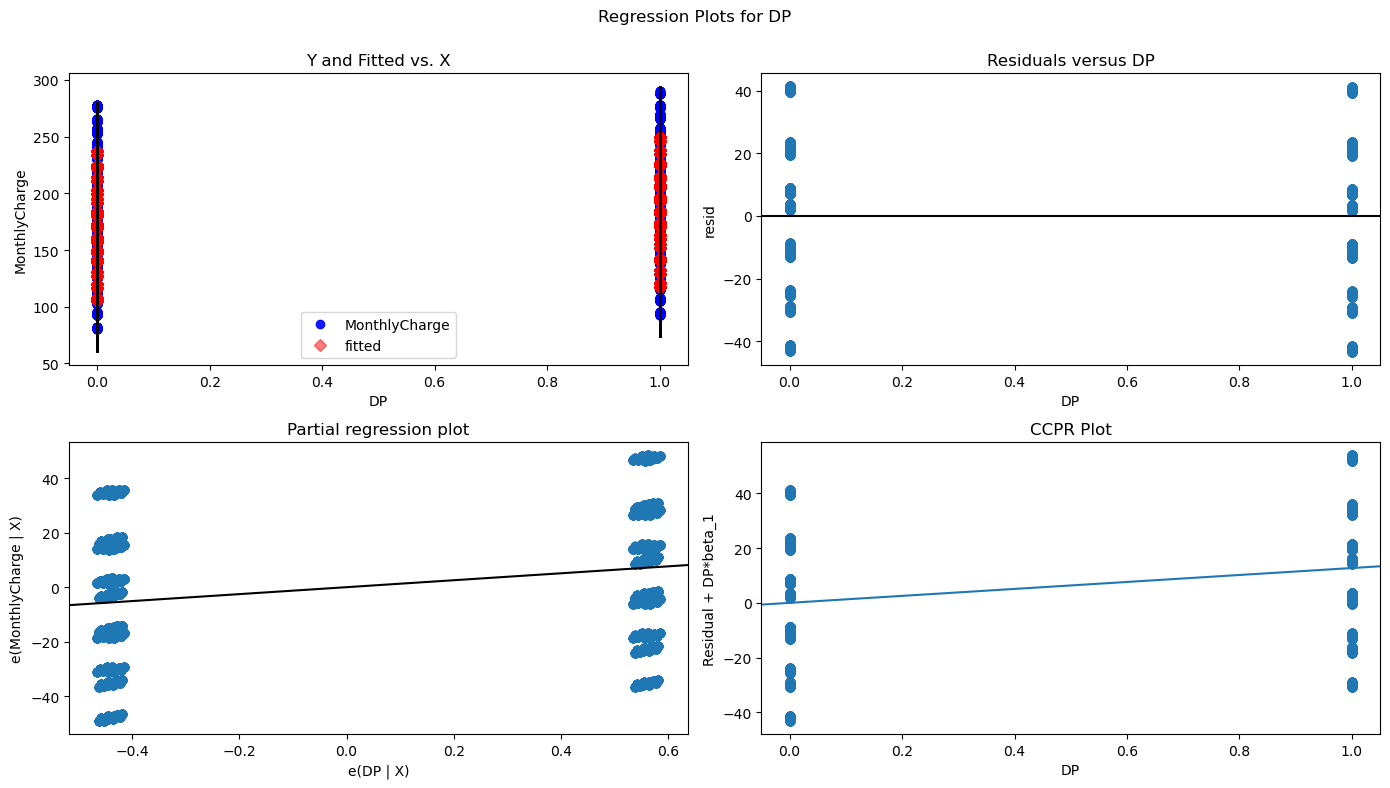

In [68]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'DP', fig=fig)




eval_env: 1


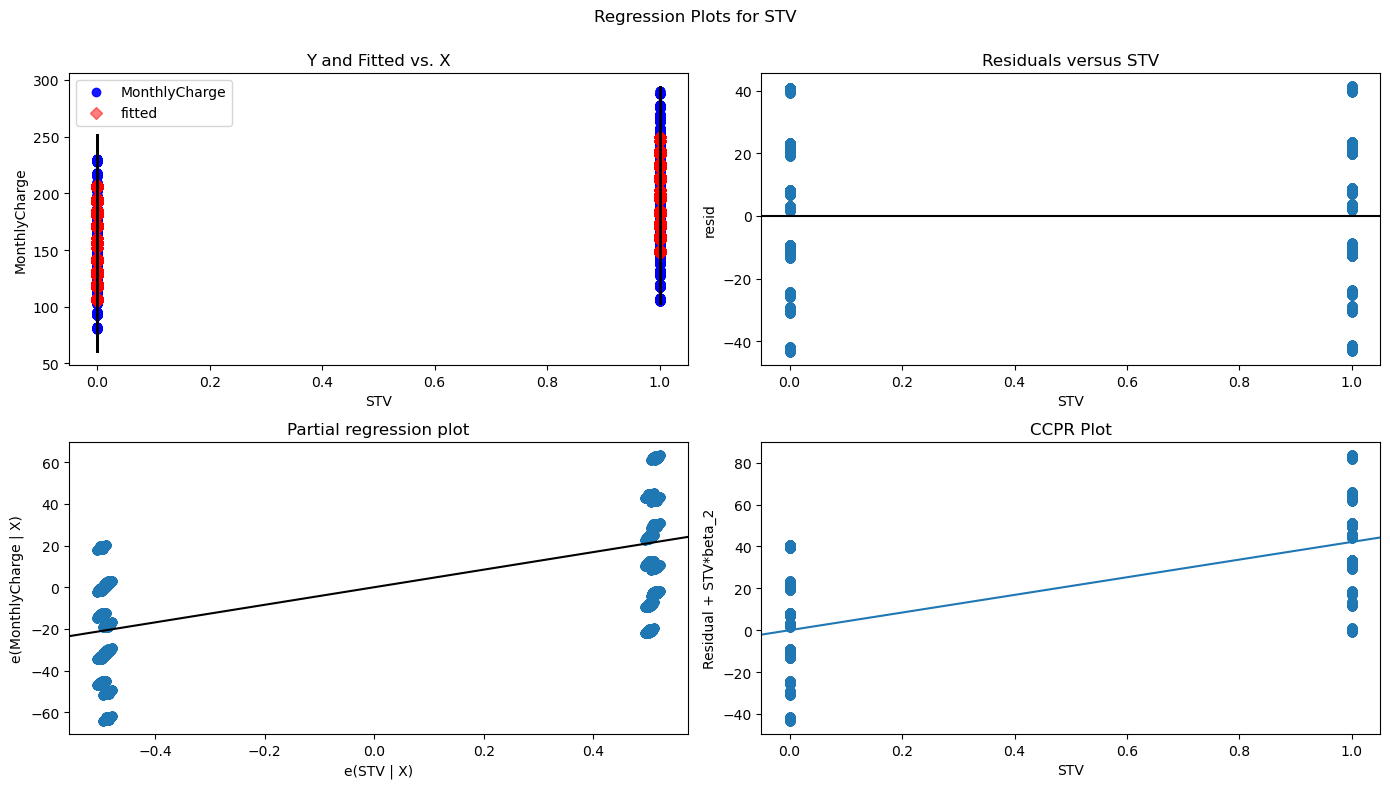

In [69]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'STV', fig=fig)


eval_env: 1


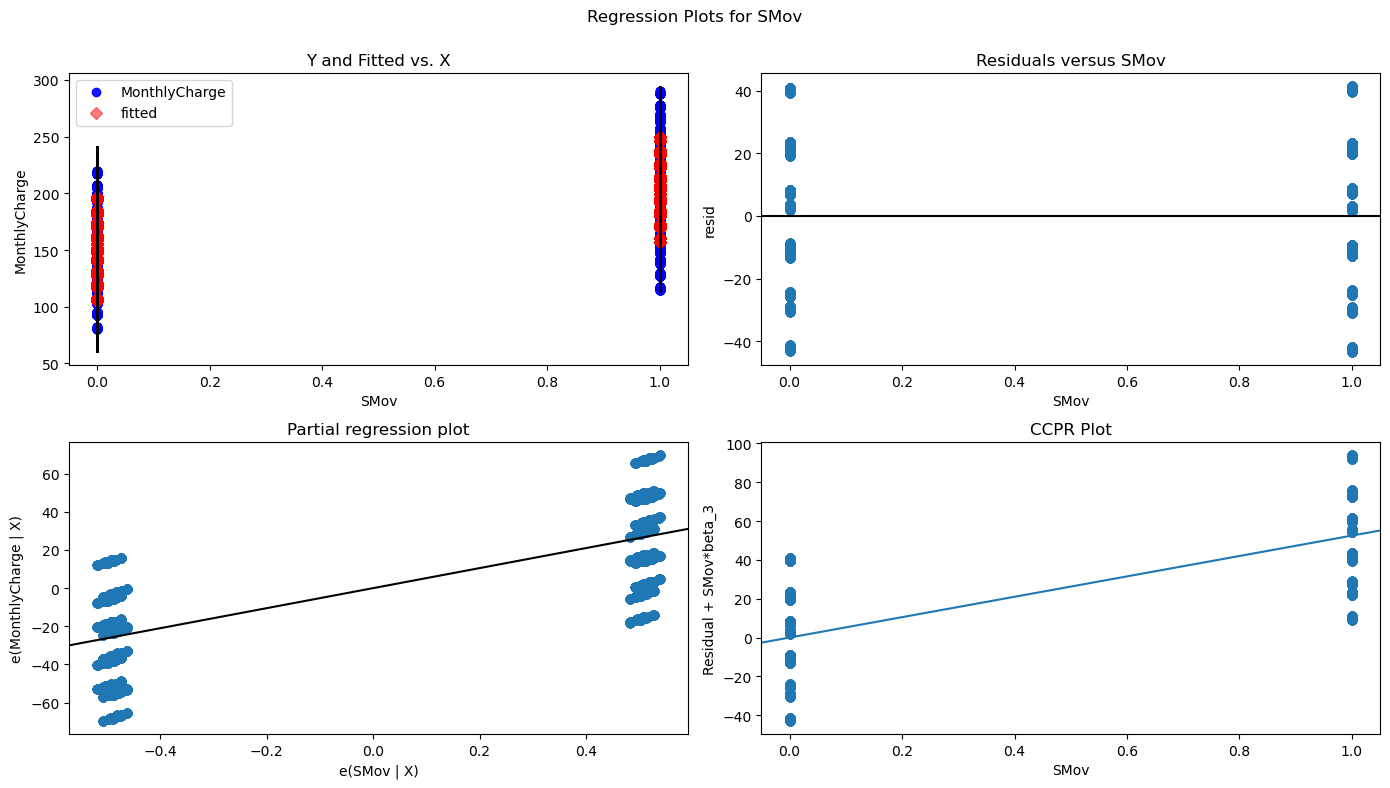

In [70]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'SMov', fig=fig)


eval_env: 1


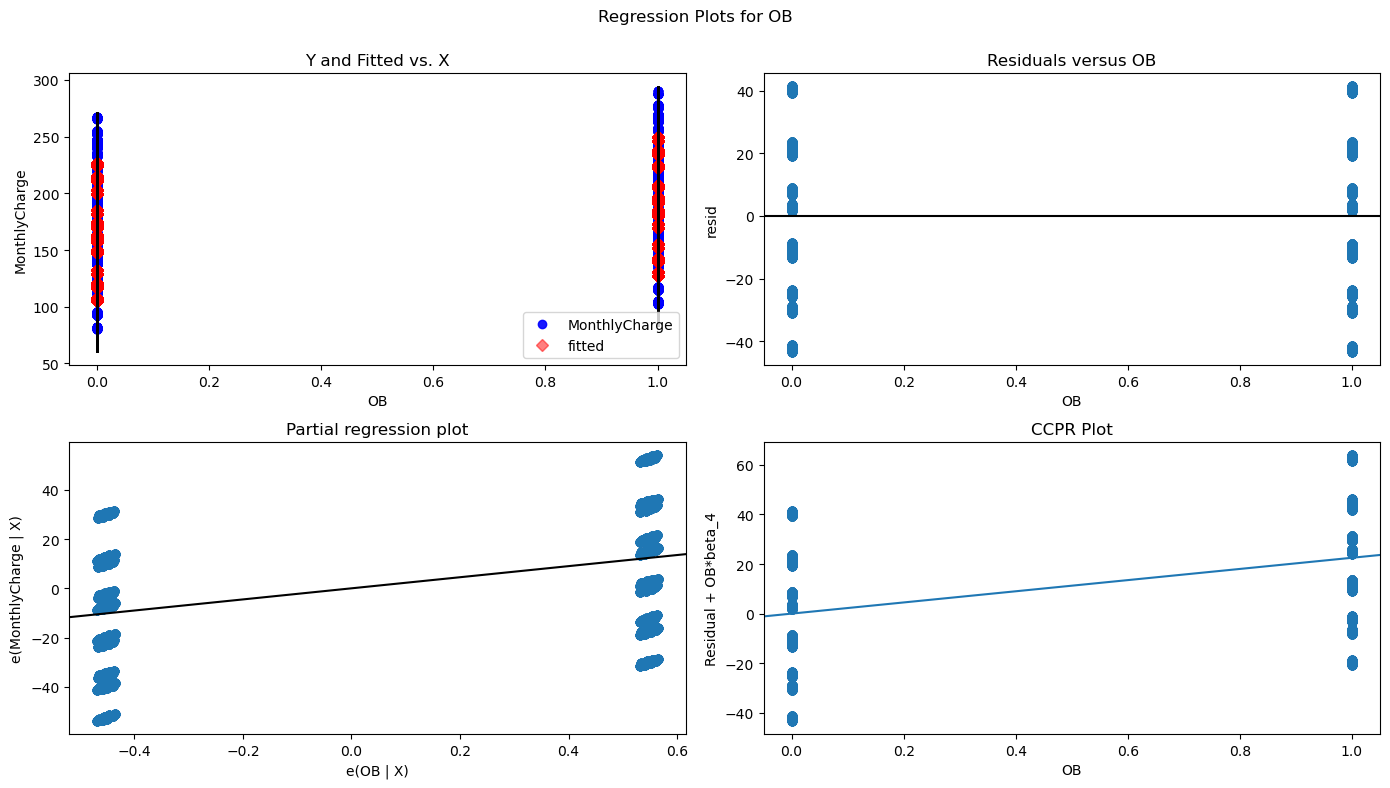

In [71]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'OB', fig=fig)


eval_env: 1


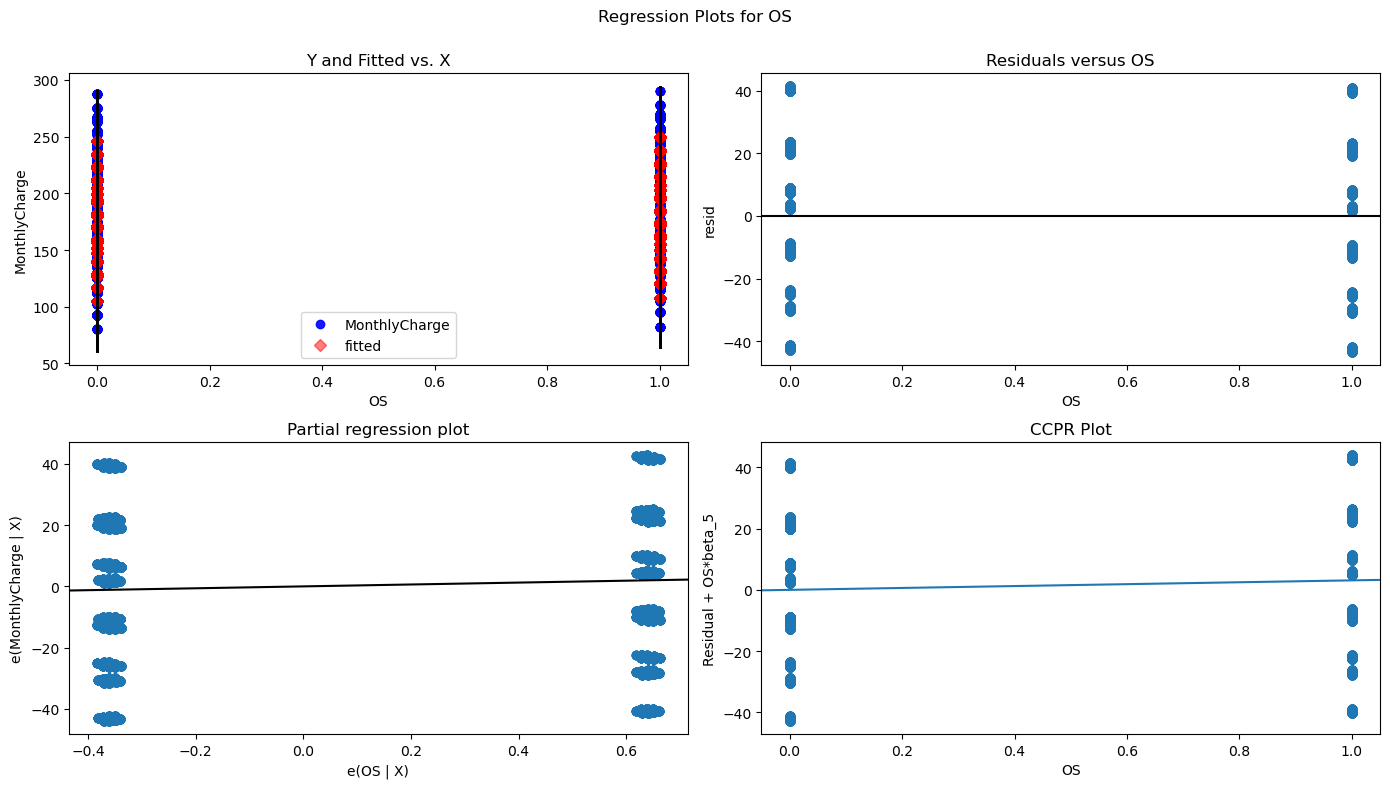

In [72]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'OS', fig=fig)


eval_env: 1


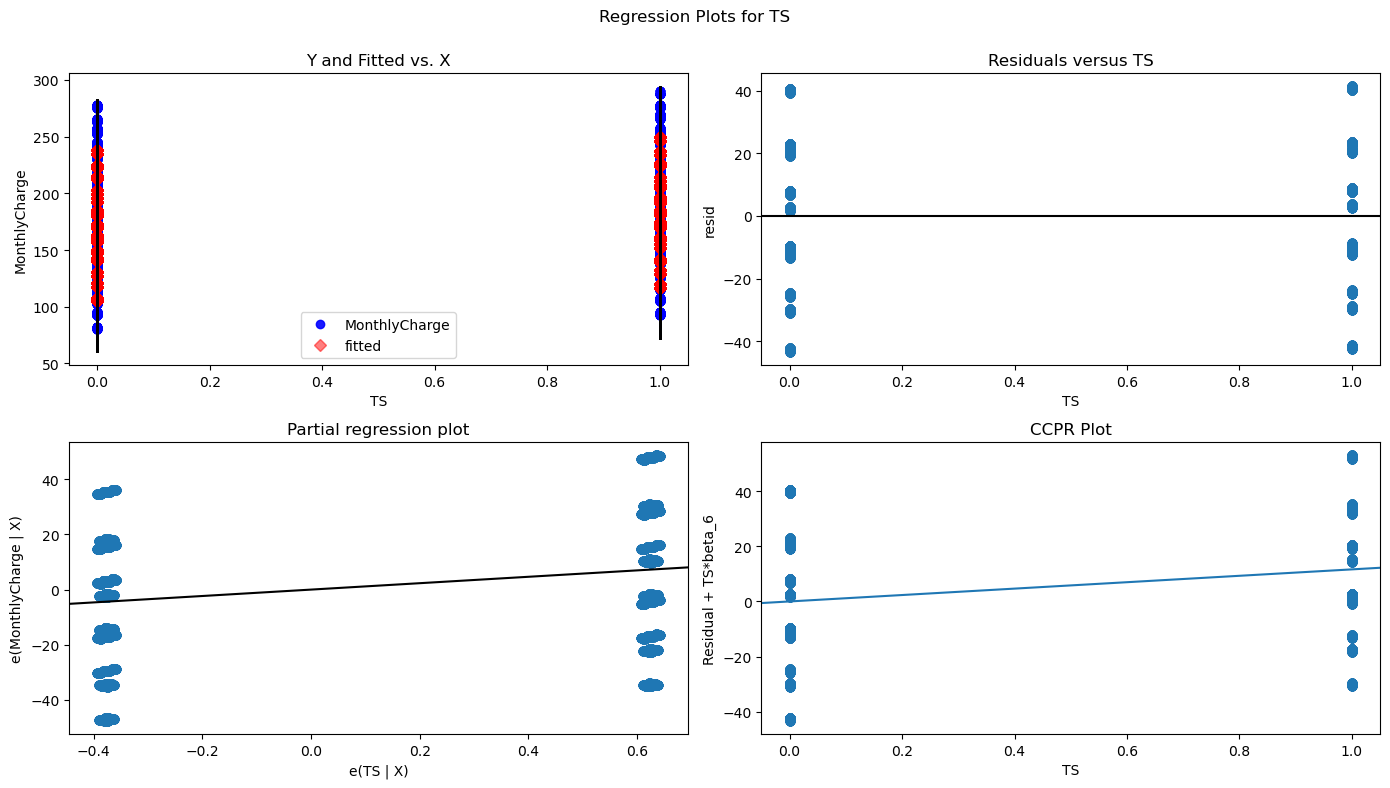

In [73]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est8, 'TS', fig=fig)


In [75]:
model = sm.OLS(Y, X).fit()
mse=model.mse_resid
print(mse)

2474.8709273588443


In [76]:
rse=np.sqrt(mse)
print(rse)

49.74807460956499
